In [31]:
folder = r'D:\Tài liệu học tập\UEH\Năm 3\HKC - 2024\Lập trình phân tích dữ liệu\Đồ án'

In [32]:
## Các thư viện
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
class Graph:
    def __init__(self):
        self.edges = {}
    
    def add_edge(self, v_from, v_to, weight):
        if v_from not in self.edges:
            self.edges[v_from] = []
        if v_to not in self.edges:
            self.edges[v_to] = []
        
        # Thêm cả hai chiều vì đây là đồ thị vô hướng
        self.edges[v_from].append((v_to, weight))
        self.edges[v_to].append((v_from, weight))

In [34]:
class Dijkstra:
    def __init__(self, graph):
        self.graph = graph
    
    def find_shortest_path(self, start, end):
        # Bảng lưu trữ khoảng cách ngắn nhất từ đỉnh bắt đầu đến các đỉnh khác
        distances = {vertex: float('inf') for vertex in self.graph.edges}
        distances[start] = 0
        priority_queue = [(0, start)]  # heap lưu trữ (khoảng cách, đỉnh)
        previous_vertices = {vertex: None for vertex in self.graph.edges}

        while priority_queue:
            current_distance, current_vertex = heapq.heappop(priority_queue)

            # Nếu khoảng cách hiện tại lớn hơn khoảng cách đã lưu, bỏ qua
            if current_distance > distances[current_vertex]:
                continue

            for neighbor, weight in self.graph.edges[current_vertex]:
                distance = current_distance + weight

                # Cập nhật khoảng cách nếu tìm được đường đi ngắn hơn
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous_vertices[neighbor] = current_vertex
                    heapq.heappush(priority_queue, (distance, neighbor))

        # Truy ngược lại để tìm đường đi từ đích
        path, current_vertex = [], end
        while current_vertex is not None:
            path.append(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        path = path[::-1]  # Đảo ngược danh sách để có thứ tự đúng

        if distances[end] == float('inf'):
            return None, None  # Không có đường đi
        return path, distances[end]

In [35]:
graph = Graph()
df = pd.read_csv(folder + '/Graph.csv')

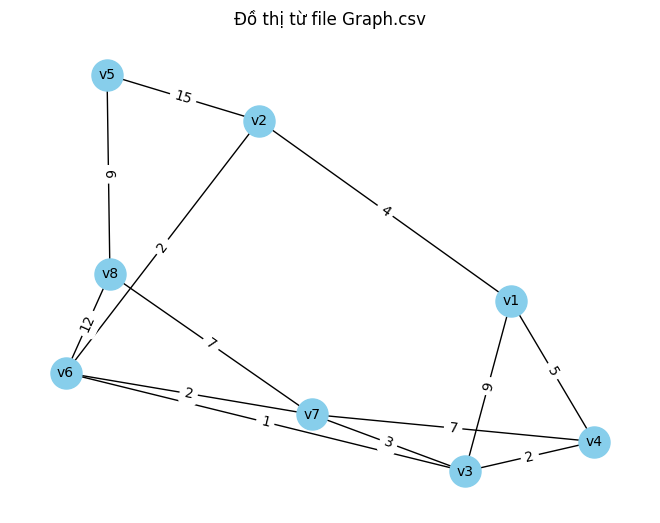

In [36]:
for index, row in df.iterrows():
    graph.add_edge(row['v_from'], row['v_to'], row['weight'])

# Tạo đồ thị NetworkX
G = nx.Graph()
for u in graph.edges:
    for v, weight in graph.edges[u]:
        G.add_edge(u, v, weight=weight)

# Vẽ đồ thị
pos = nx.spring_layout(G)  # Sử dụng thuật toán spring_layout để sắp xếp các nút
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Đồ thị từ file Graph.csv')
plt.show()

In [37]:
dijkstra = Dijkstra(graph)

Đường đi ngắn nhất từ v1 đến v8: v1 -> v2 -> v6 -> v7 -> v8 với độ dài 15
Độ dài đường đi: 15


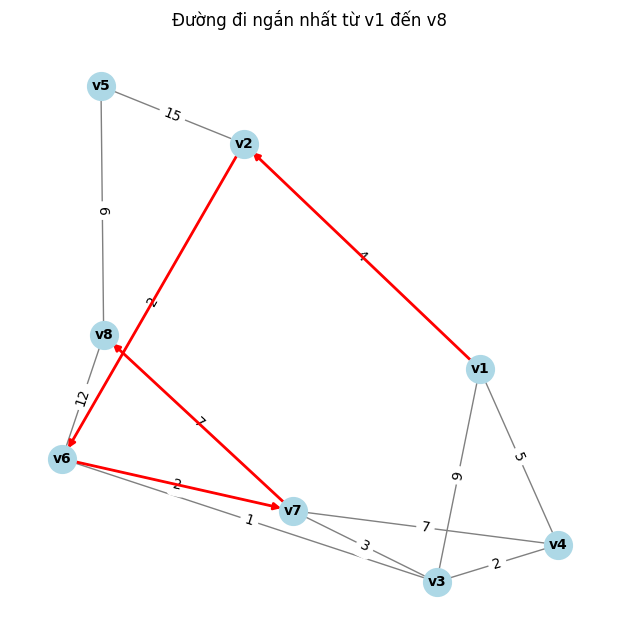

In [38]:
start = input("Nhập đỉnh bắt đầu: ")
end = input("Nhập đỉnh kết thúc: ")
path, distance = dijkstra.find_shortest_path(start, end)

if path:
    print(f"Đường đi ngắn nhất từ {start} đến {end}: {' -> '.join(path)} với độ dài {distance}")
    print(f"Độ dài đường đi: {distance}")

    # Vẽ lại đồ thị với đường đi ngắn nhất được tô đậm
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=400, font_size=10, font_weight='bold', arrows=True)  # Thêm arrows=True
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

    # Tô đậm đường đi ngắn nhất
    edge_list = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='red', width=2, arrows=True, arrowstyle= '-|>')  # Thêm arrows=True

    plt.title(f"Đường đi ngắn nhất từ {start} đến {end}")
    plt.show()
else:
    print(f"Không tìm thấy đường đi từ {start} đến {end}")